Data Set  –  diabetic 

Data Information:-
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Attribute information :-
    
    Pregnancies - Number of times pregnant
    Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure - Diastolic blood pressure (mm Hg)
    SkinThickness - Triceps skin fold thickness (mm)
    Insulin - 2-Hour serum insulin (mu U/ml)
    BMI - Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction - Diabetes pedigree function
    Age - Age (years)
    Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0


In class Assignment Expectations/Steps -

-	Apply Data Cleaning to the Datasets and then apply PCA Find pattern and the choose the number of desired Principal components.
-	Provide the inferences for the above analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
y  = df['class']
xp = df.drop(columns=['class'])

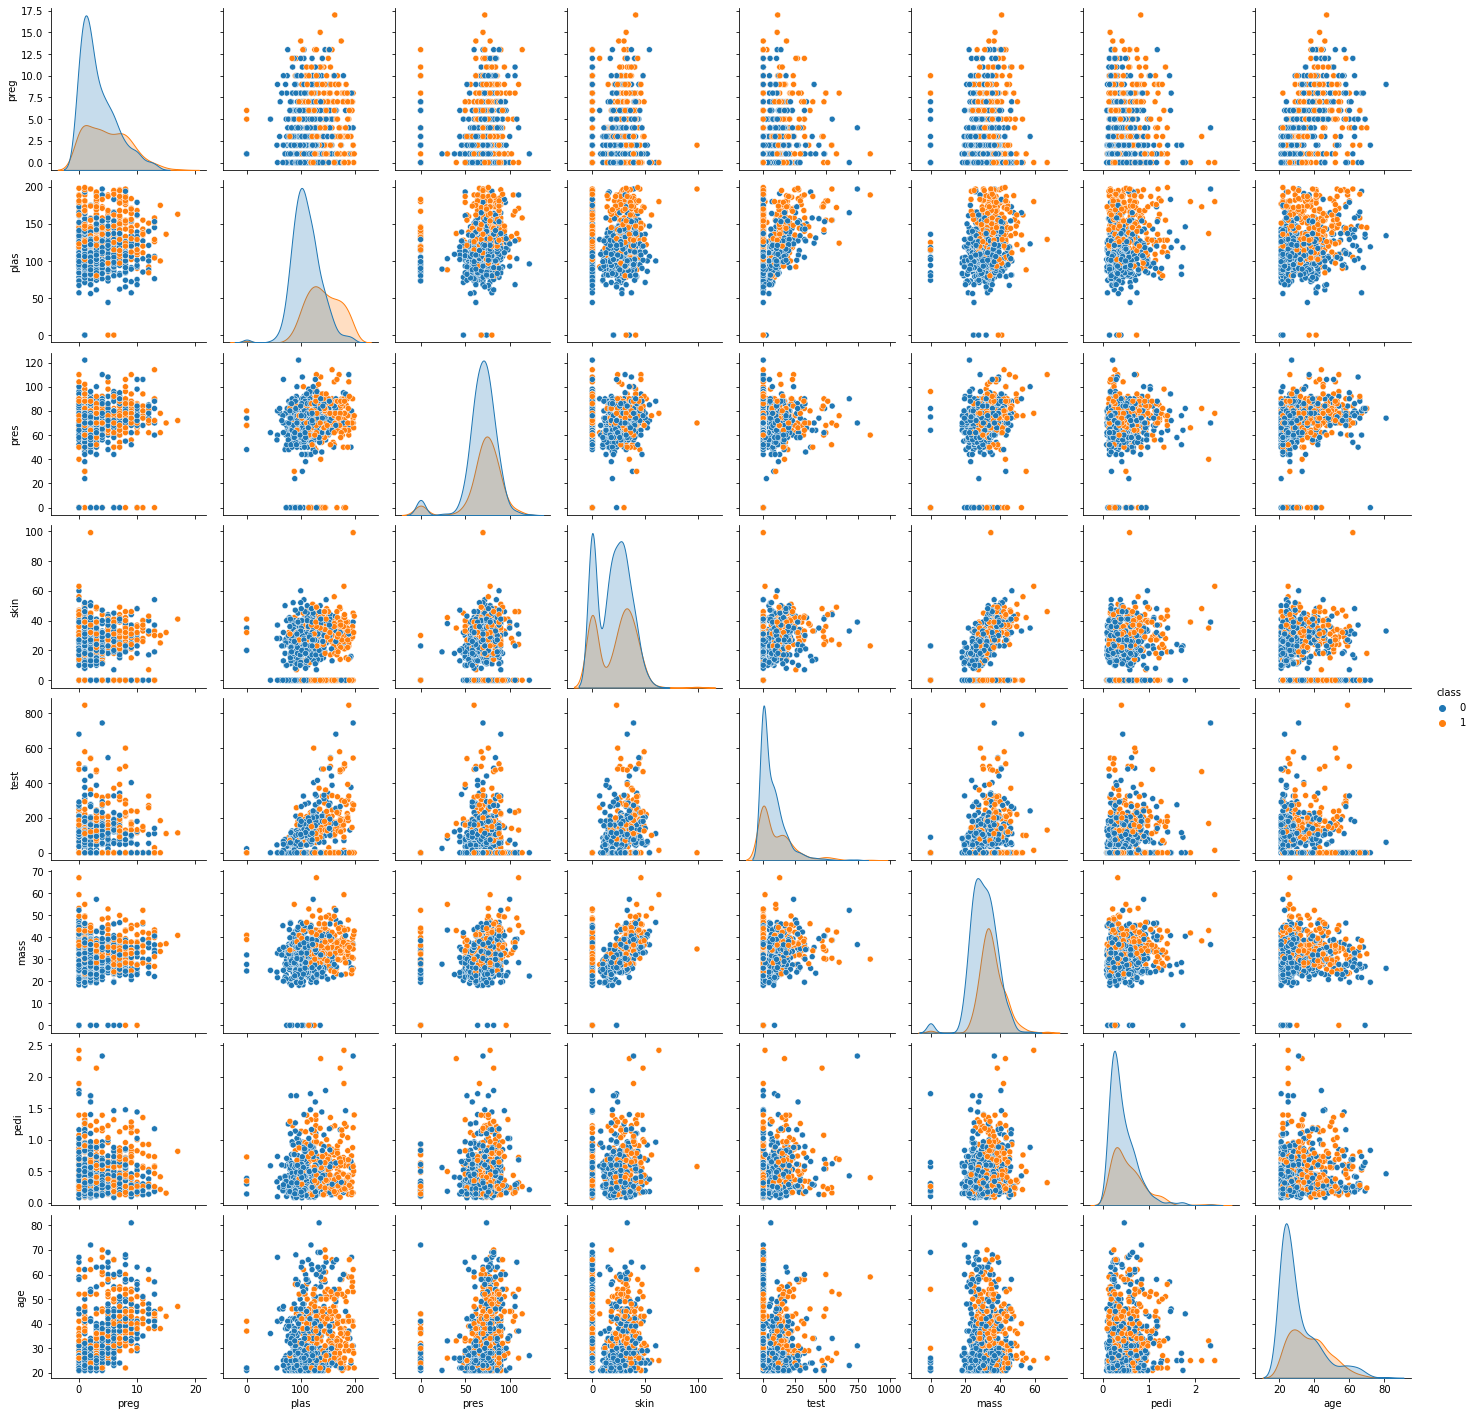

In [10]:
sns.pairplot(df,diag_kind='kde',hue='class')

In [26]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

x = pd.DataFrame(pt.fit_transform(xp),columns = xp.columns)

In [27]:
x.shape

(768, 8)

In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA

In [36]:
pca = PCA()

In [49]:
x_centre = x-x.mean(axis=0)
x_transformed = pca.fit_transform(x_centre)

In [50]:
pca.explained_variance_ratio_

array([0.25320168, 0.24189736, 0.12058083, 0.11379906, 0.10181561,
       0.08201081, 0.04504084, 0.0416538 ])

In [51]:
pca.explained_variance_

array([2.02825439, 1.93770197, 0.96590433, 0.91157945, 0.81558688,
       0.65694187, 0.36079652, 0.33366485])

In [52]:
pca.components_

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00,  6.72127316e-16,
         7.94551524e-16,  1.58584938e-16, -1.63536703e-16,
        -6.04585953e-17,  7.14081828e-17],
       [ 0.00000000e+00, -6.93144815e-16,  1.00000000e+00,
         1.16774528e-14, -7.18241828e-16,  1.47814378e-15,
         1.09508396e-15,  4.92794085e-16],
       [ 0.00000000e+00, -3.87349041e-16, -1.13986681e-14,
         1.00000000e+00, -2.47144382e-16, -3.98019124e-16,
        -2.00329028e-15,  4.94288764e-16],
       [ 0.00000000e+00, -2.15347141e-16,  3.33356848e-16,
         3.95959965e-16,  1.00000000e+00, -1.87205165e-16,
        -3.85715748e-15,  2.76171331e-16],
       [-0.00000000e+00,  1.61761287e-16, -1.35588605e-15,
         6.70304608e-16,  2.40196189e-16,  1.00000000e+00,
        -1.43208019e-15,  2.13497013e-16],
       [ 0.00000000e+00,  6.045859

In [57]:
pca = PCA(n_components=6)

In [58]:
x_centre = x-x.mean(axis=0)
x_transformed = pca.fit_transform(x_centre)

In [59]:
pca.explained_variance_ratio_

array([0.25320168, 0.24189736, 0.12058083, 0.11379906, 0.10181561,
       0.08201081])

In [60]:
sum(pca.explained_variance_ratio_)

0.9133053600097647

# Conclusions:
There are total 8 features excluding the target variable. 

The eigen vectors obtained are:
array([
        
        [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,0.00000000e+00, -0.00000000e+00, -0.00000000e+00,-0.00000000e+00, -0.00000000e+00],
       
       [-0.00000000e+00,  1.00000000e+00,  6.72127316e-16,7.94551524e-16,  1.58584938e-16, -1.63536703e-16,-6.04585953e-17,  7.14081828e-17],
       
       [ 0.00000000e+00, -6.93144815e-16,  1.00000000e+00,1.16774528e-14, -7.18241828e-16,  1.47814378e-15,1.09508396e-15,  4.92794085e-16],
       
       [ 0.00000000e+00, -3.87349041e-16, -1.13986681e-14,1.00000000e+00, -2.47144382e-16, -3.98019124e-16,-2.00329028e-15,  4.94288764e-16],
       
       [ 0.00000000e+00, -2.15347141e-16,  3.33356848e-16,3.95959965e-16,  1.00000000e+00, -1.87205165e-16,-3.85715748e-15,  2.76171331e-16],
       
       [-0.00000000e+00,  1.61761287e-16, -1.35588605e-15,6.70304608e-16,  2.40196189e-16,  1.00000000e+00,-1.43208019e-15,  2.13497013e-16],
       
       [ 0.00000000e+00,  6.04585953e-17, -1.09508396e-15,2.00329028e-15,  3.85715748e-15,  1.43208019e-15,1.00000000e+00, -2.87393524e-16],
       
       [-0.00000000e+00, -4.17870019e-16, -3.39640290e-16,-2.81959401e-16, -2.64052772e-16, -1.55942357e-16,2.87393524e-16,  1.00000000e+00]])
       
       
Eigen values for each feature:

    array([2.02825439, 1.93770197, 0.96590433, 0.91157945, 0.81558688,0.65694187, 0.36079652, 0.33366485])
    
The percentage of variation explained by:

    PCA 1 = 25.320168%
    PCA 2 = 24.189736%
    PCA 3 = 12.058083%
    PCA 4 = 11.379906%
    PCA 5 = 10.181561%
    PCA 6 = 8.201081%
    PCA 7 = 4.504084%
    PCA 8 = 4.16538%
    
For this problem, we can consider 6 principal components which will explain 91.33053600097647% of the variations.